## **Credit Card Clients Delinquency Prediction**

**Dataset Link:** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

**Business Problem Definition:**  

Financial institutions continuously seek reliable methods to predict client delinquency on credit card payments. Accurate predictions can significantly reduce financial risk, refine lending strategies, and enhance customer service.  

This project focuses on developing predictive models from scratch that predict client defaults in the subsequent month based on historical data. By identifying the characteristics and patterns of clients prone to default, preemptive actions can be strategized to diminish potential financial losses.

**Problem Setting:**

The problem at hand is a binary classification task where the outcome variable (Y) indicates whether a client will default (1) or not (0) in the next month. The challenge lies in utilizing historical payment data, billing statements, and client information to build a robust predictive model without reliance on pre-built libraries for model development.


**Data Dictionary:**

The dataset is sourced from the UCI Machine Learning Repository and contains 30,000 records and 25 instances. It comprises various features such as credit limit, gender, education, marital status, age, past payment history, bill statements, and previous payment amounts.  



This diverse dataset will be leveraged to understand the relationship between client attributes and default behavior. Given the absence of missing values, the dataset offers a suitable foundation for analysis.  



Given below is the data dictionary of the dataset: -



Default Payment Next Month (Yes = 1, No = 0)



Sex (1 = male; 2 = female)



Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)



Marriage (1 = married; 2 = single; 3 = others)



Age (years)



Pay_0; . . . ; Pay_6 (-2 = No credit consumed; -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months)



Bill_Amt1; . . . ;Bill_Amt6 (in NT dollar) (Amount of bill in September 2005; . . . ; Amount of bill in April 2005)



Pay_Amt1; . . .; Pay_Amt6 (in NT dollar) (Amount paid in September 2005; . . . ; Amount paid in April 2005)


In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients.xls


In [2]:
pd.set_option('display.max_columns', 45)
df = pd.read_excel("default of credit card clients.xls")
df.columns = df.iloc[0]
df = df[1:]
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


## **Data Cleaning and Pre-Processing**

In [3]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [5]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'ID': array([1, 2, 3, ..., 29998, 29999, 30000], dtype=object),
 'LIMIT_BAL': array([20000, 120000, 90000, 50000, 500000, 100000, 140000, 200000,
        260000, 630000, 70000, 250000, 320000, 360000, 180000, 130000,
        450000, 60000, 230000, 160000, 280000, 10000, 40000, 210000,
        150000, 380000, 310000, 400000, 80000, 290000, 340000, 300000,
        30000, 240000, 470000, 480000, 350000, 330000, 110000, 420000,
        170000, 370000, 270000, 220000, 190000, 510000, 460000, 440000,
        410000, 490000, 390000, 580000, 600000, 620000, 610000, 700000,
        670000, 680000, 430000, 550000, 540000, 1000000, 530000, 710000,
        560000, 520000, 750000, 640000, 16000, 570000, 590000, 660000,
        720000, 327680, 740000, 800000, 760000, 690000, 650000, 780000,
        730000], dtype=object),
 'SEX': array([2, 1], dtype=object),
 'EDUCATION': array([2, 1, 3, 5, 4, 6, 0], dtype=object),
 'MARRIAGE': array([1, 2, 3, 0], dtype=object),
 'AGE': array([24, 26, 34, 37, 57, 2

In [6]:
df = df.drop('ID', axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
float_columns = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[float_columns] = df[float_columns].astype(float)

In [8]:
int_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']
df[int_columns] = df[int_columns].astype(int)

In [9]:
df['EDUCATION'] = df['EDUCATION'].replace([5, 6, 0], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace([0], 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [11]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [12]:
df['Total_due']= df['PAY_AMT1'] - df['PAY_AMT2'] - df['PAY_AMT3'] - df['PAY_AMT4'] - df['PAY_AMT5'] - df['PAY_AMT6'] + df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

In [13]:
df = df.rename(columns={'PAY_0': 'REPAY_STATUS_SEP', 'PAY_2': 'REPAY_STATUS_AUG', 'PAY_3': 'REPAY_STATUS_JULY',
                        'PAY_4': 'REPAY_STATUS_JUNE', 'PAY_5': 'REPAY_STATUS_MAY', 'PAY_6': 'REPAY_STATUS_APR',
                        'BILL_AMT1': 'BILL_AMT_SEP', 'BILL_AMT2': 'BILL_AMT_AUG', 'BILL_AMT3': 'BILL_AMT_JULY',
                        'BILL_AMT4': 'BILL_AMT_JUNE', 'BILL_AMT5': 'BILL_AMT_MAY', 'BILL_AMT6': 'BILL_AMT_APR',
                        'PAY_AMT1': 'PAY_AMT_SEP', 'PAY_AMT2': 'PAY_AMT_AUG', 'PAY_AMT3': 'PAY_AMT_JULY',
                        'PAY_AMT4': 'PAY_AMT_JUNE', 'PAY_AMT5': 'PAY_AMT_MAY', 'PAY_AMT6': 'PAY_AMT_APR'})

In [14]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,Total_due
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7015.0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,12077.0
3,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,93671.0
4,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,226946.0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,54290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,699799.0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,10366.0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,39196.0
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,291230.0


In [15]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'LIMIT_BAL': array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
         200000,  260000,  630000,   70000,  250000,  320000,  360000,
         180000,  130000,  450000,   60000,  230000,  160000,  280000,
          10000,   40000,  210000,  150000,  380000,  310000,  400000,
          80000,  290000,  340000,  300000,   30000,  240000,  470000,
         480000,  350000,  330000,  110000,  420000,  170000,  370000,
         270000,  220000,  190000,  510000,  460000,  440000,  410000,
         490000,  390000,  580000,  600000,  620000,  610000,  700000,
         670000,  680000,  430000,  550000,  540000, 1000000,  530000,
         710000,  560000,  520000,  750000,  640000,   16000,  570000,
         590000,  660000,  720000,  327680,  740000,  800000,  760000,
         690000,  650000,  780000,  730000]),
 'SEX': array([2, 1]),
 'EDUCATION': array([2, 1, 3, 4]),
 'MARRIAGE': array([1, 2, 3]),
 'AGE': array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 

In [16]:
last_col_index = df.columns.get_loc(df.columns[-1])
last_col_name = df.columns[-1]
second_last_col_name = df.columns[-2]
last_col = df.pop(last_col_name)
second_last_col = df.pop(second_last_col_name)
df.insert(last_col_index - 1, last_col_name, last_col)

df.insert(last_col_index, second_last_col_name, second_last_col)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,Total_due,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7015.0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,12077.0,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,93671.0,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,226946.0,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,54290.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,699799.0,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,10366.0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,39196.0,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,291230.0,1


In [17]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,Total_due,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,2.495374e+05,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,3.692803e+05,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,-9.244100e+05,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,1.292625e+04,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,1.093925e+05,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,3.191455e+05,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,4.217648e+06,1.000000


## **EDA**

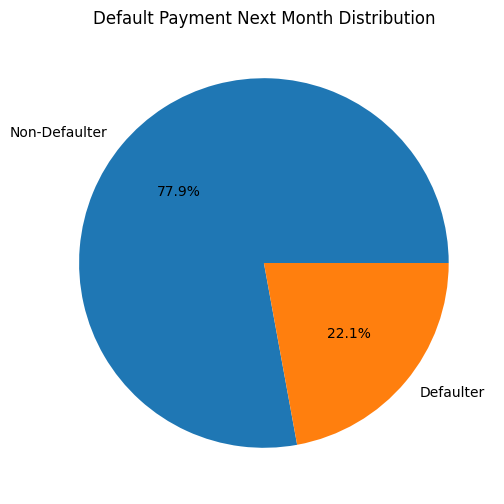

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df

plt.figure(figsize=(6, 6))
default_count = df1['default payment next month'].value_counts()

labels = ['Non-Defaulter', 'Defaulter']

plt.pie(default_count, labels=labels, autopct='%1.1f%%')
plt.title('Default Payment Next Month Distribution')
plt.show()

The Pie chart represents the percentage of customer who will be either Non-Defaulter or Defaulter Next Month.

It is visible that majority of the customers will be Non-defaulter the next month with 77.9%.

22.1% of the customers might be defaulter next month

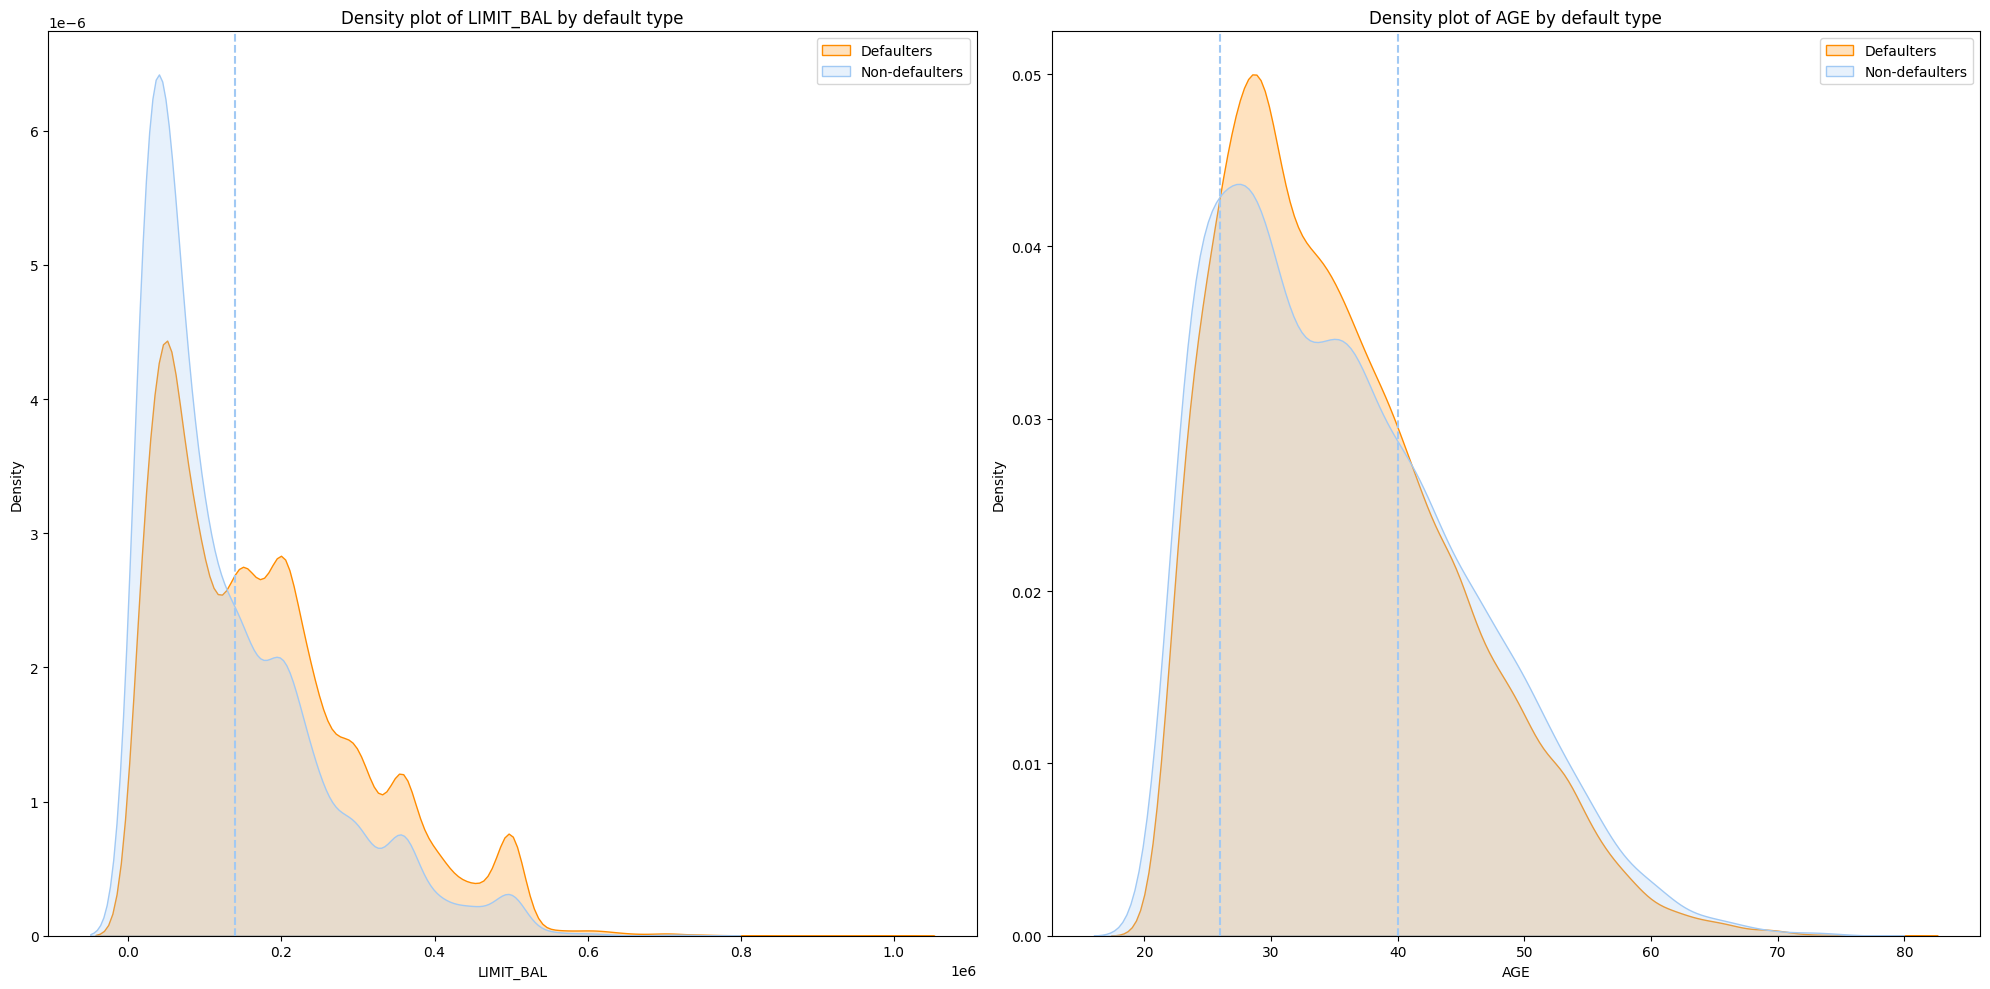

In [19]:
sns.set_palette(palette='pastel')
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

limit_0 = df1.loc[df1['default payment next month'] == 0]['LIMIT_BAL']
limit_1 = df1.loc[df1['default payment next month'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(limit_0, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(limit_1, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

age_0 = df1.loc[df1['default payment next month'] == 0]['AGE']
age_1 = df1.loc[df1['default payment next month'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(age_0, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(age_1, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
plt.show()

The above graph shows denisty plot of Defaulter Type vs LIMIT_BAL and Age vs Defaulter Type. Users having low credit car limits tends to be non-defaulters. As the limit increases the probability of beiing defaulter increases. Approximately From ages  25 - 40 had highest number of defaulters which started to decrese with increase in age.

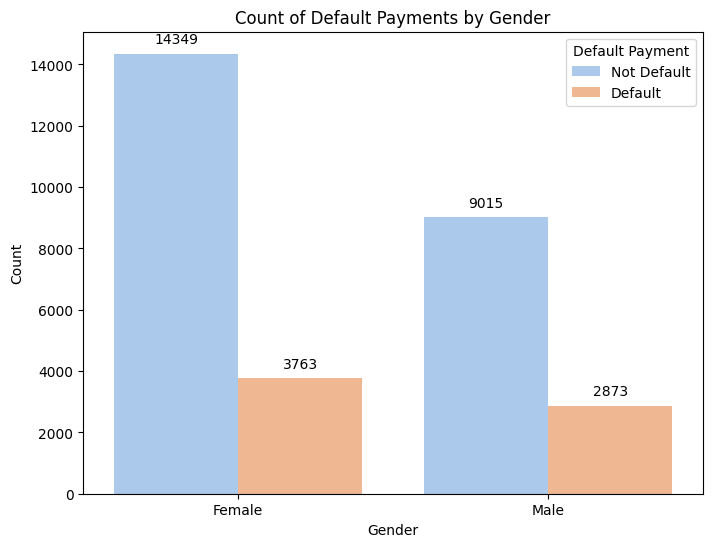

In [20]:
df1['SEX'] = df1['SEX'].replace({1: 'Male', 2: 'Female'})

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df1, x='SEX', hue='default payment next month')

plt.title('Count of Default Payments by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['Not Default', 'Default'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

The bar chart represents Default payments by gender. Here it can be seen that the females are majority credit card holders with total of 18112. Males credit card holders are 11888. As majority of credit card users are Females, From the graph it is observed that females are majority defaulters.

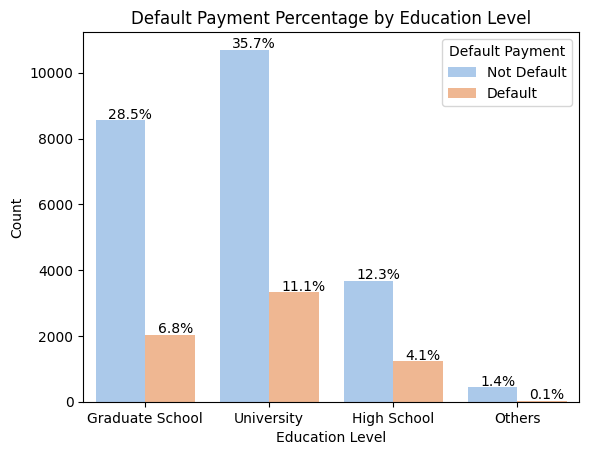

In [21]:
plot = sns.countplot(x="EDUCATION", data=df1, hue="default payment next month")

total = len(df1['EDUCATION'])
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 50
    plot.annotate(percentage, (x, y), ha='left')

plt.title('Default Payment Percentage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['Not Default', 'Default'])
plt.xticks(ticks=range(4), labels=['Graduate School', 'University', 'High School', 'Others'])
plt.show()

The above graph represents Type of defaulters with respect to their Education level. Here it is observed that Users having University level education are maximum Defaulters while high-school and other category have lowest Defaulters.

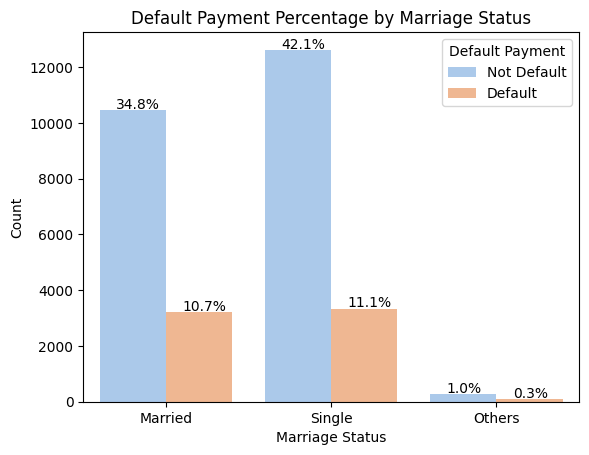

In [22]:
plot = sns.countplot(x="MARRIAGE", data=df1, hue="default payment next month")

total = len(df1['MARRIAGE'])
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 50
    plot.annotate(percentage, (x, y), ha='left')

plt.title('Default Payment Percentage by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['Not Default', 'Default'])
plt.xticks(ticks=range(3), labels=['Married', 'Single', 'Others'])
plt.show()

The above graph shows Marriage status with respect to Defaulter Type. Here we can see that the single category contributes to majority credit card users as well as majority in Defaulters

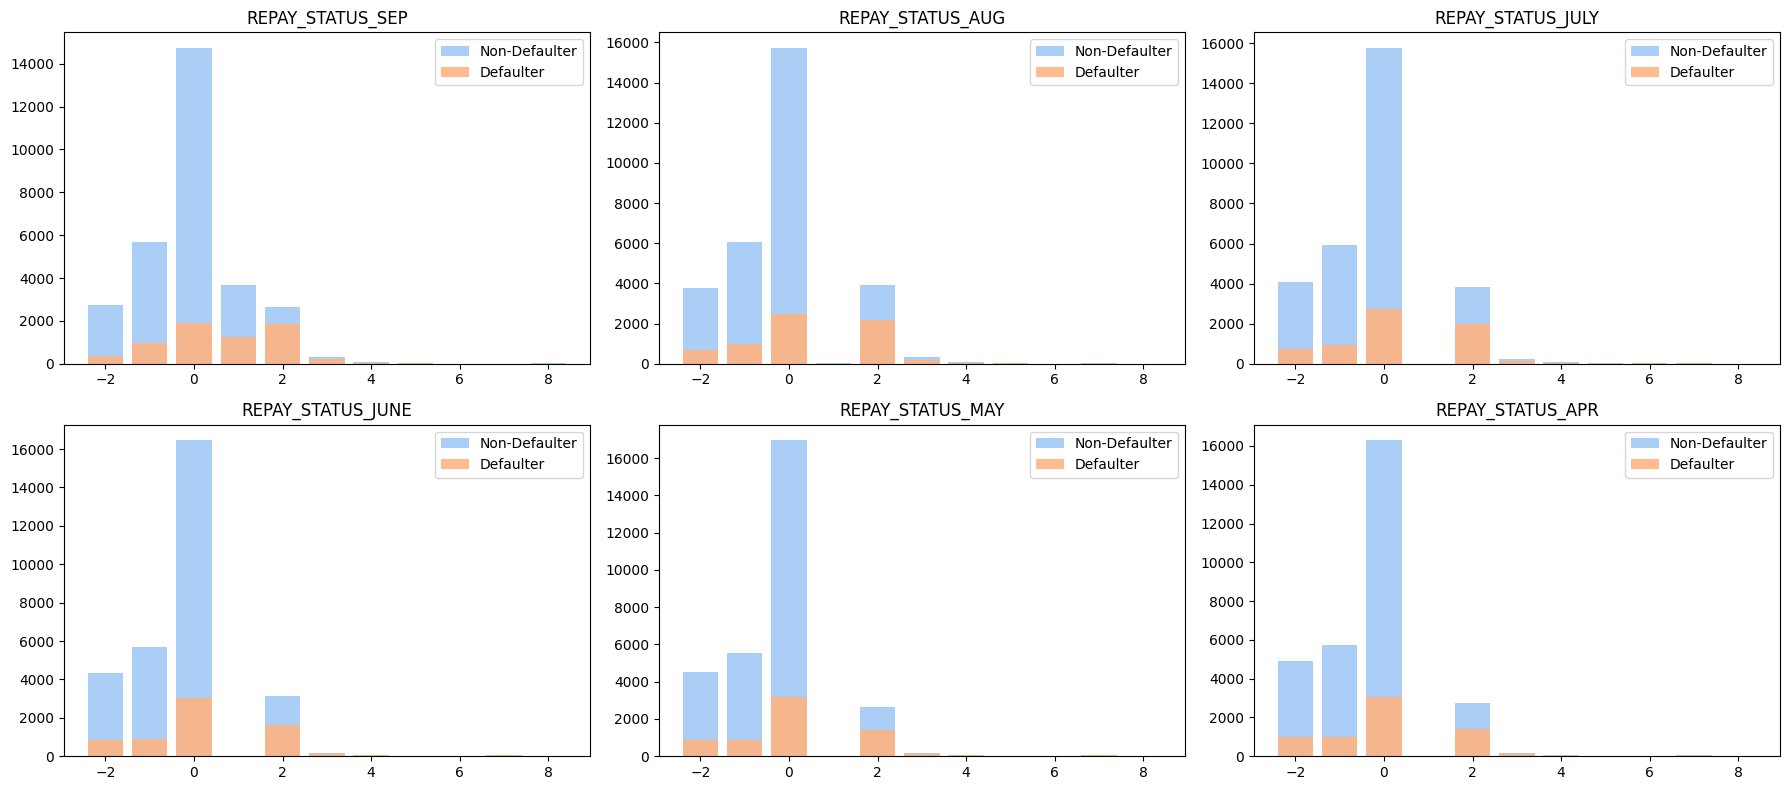

In [23]:
repay_status = ['REPAY_STATUS_SEP', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JULY',
                'REPAY_STATUS_JUNE', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR']

figure, ax = plt.subplots(2, 3)
figure.set_size_inches(18, 8)

for i in range(len(repay_status)):
    row, col = int(i / 3), i % 3

    d = df1[repay_status[i]].value_counts()
    x = df1[repay_status[i]][df1['default payment next month'] == 1].value_counts()

    ax[row, col].bar(d.index, d, align='center', alpha=0.9, label='Non-Defaulter')
    ax[row, col].bar(x.index, x, align='center', alpha=0.9, label='Defaulter')
    ax[row, col].set_title(repay_status[i])
    ax[row, col].legend()

plt.tight_layout()
plt.show()

The chart shows us the repay Status for 6 months and their respective counts for Users.

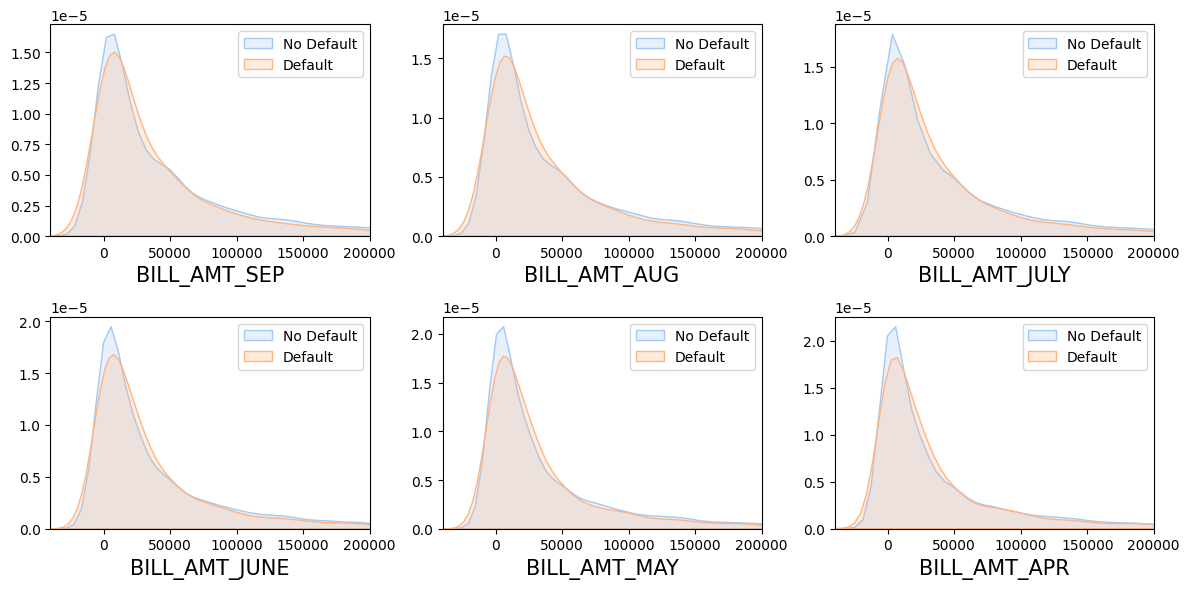

In [24]:
bill_amt = ['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APR']
plt.figure(figsize=(12,6))

for i,col in enumerate(bill_amt):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df1.loc[(df1['default payment next month'] == 0), col], label = 'No Default', fill = True)
    sns.kdeplot(df1.loc[(df1['default payment next month'] == 1), col], label = 'Default', fill = True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.show()

The above graph shows density distributions of Bill amounts for 6 months (April, May, June, July, August, and September) for defaulters and non-defaulters over time.

It is visible that for lower billing amount users tend to be non-defaulters.

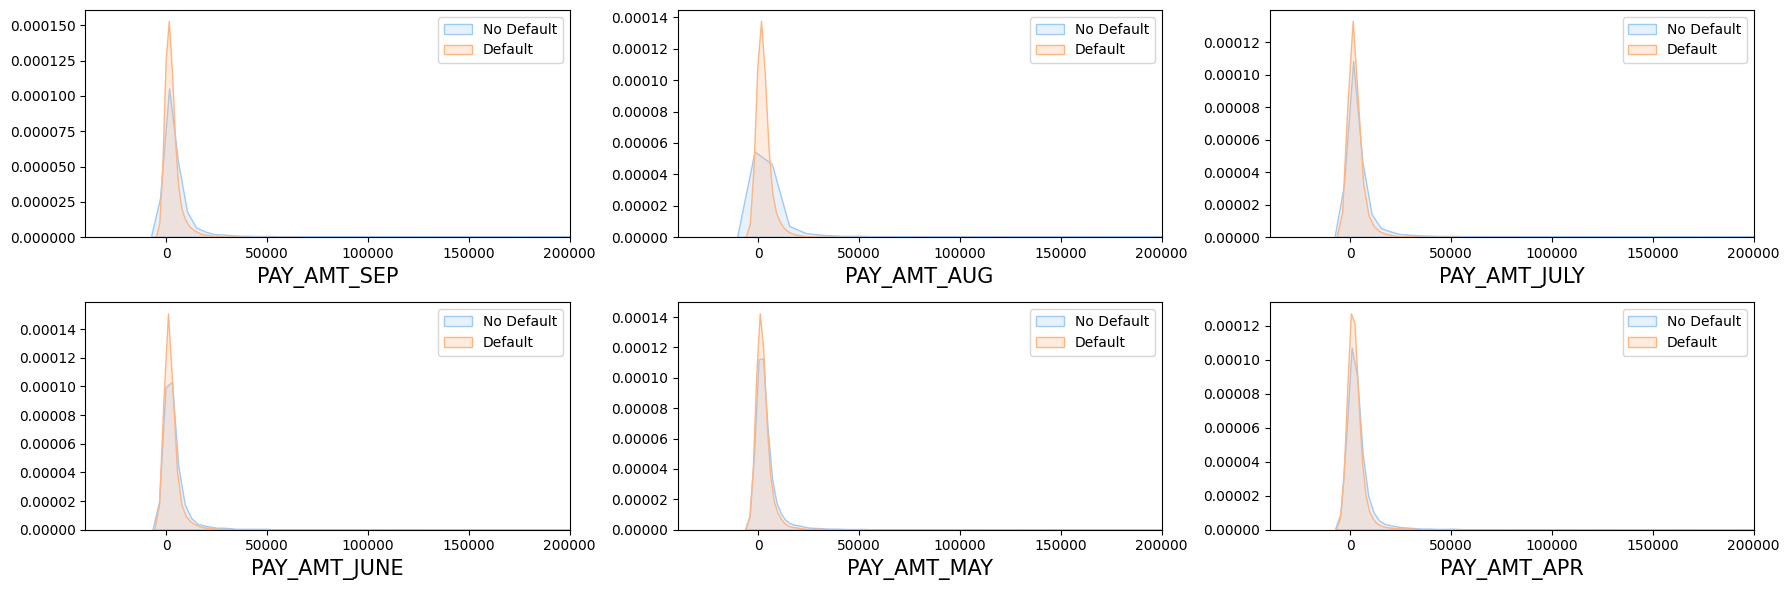

In [25]:
pay_amt = ['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APR']
plt.figure(figsize=(18,6))

for i,col in enumerate(pay_amt):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df1.loc[(df1['default payment next month'] == 0), col], label = 'No Default', fill = True)
    sns.kdeplot(df1.loc[(df1['default payment next month'] == 1), col], label = 'Default', fill = True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.show()

The above graph shows density distributions of Pay Amount for 6 months (April, May, June, July, August, September) for defaulters and non-defaulters over the time.

It is visible that for low paying amount users tend to be defaulters.

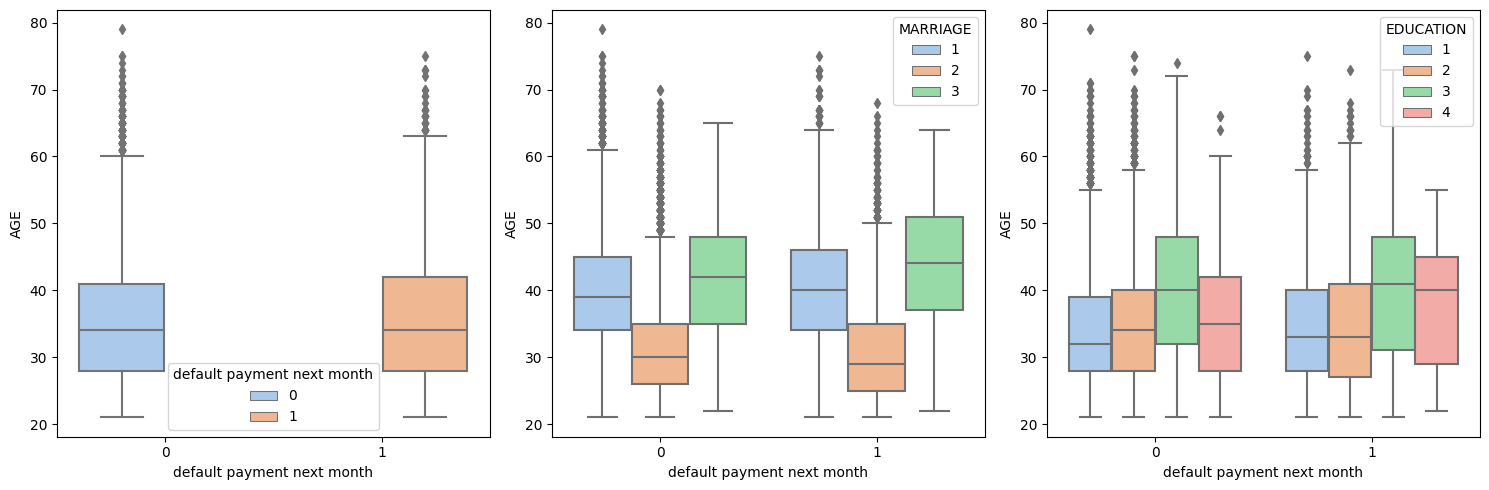

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Creating subplots with 1 row and 3 columns

sns.boxplot(ax=axes[2], x='default payment next month', hue='EDUCATION', y='AGE', data=df1)
sns.boxplot(ax=axes[1], x='default payment next month', hue='MARRIAGE', y='AGE', data=df1)
sns.boxplot(ax=axes[0], x='default payment next month', y='AGE', hue='default payment next month', data=df1)
plt.tight_layout()
plt.show()

The first graph shows spread of data for default payment next month Vs. Age, here we can see that there are lot of outliers in non-default users.

The next graphs show spread of data for default payment next month Vs. Age with respect to Marriage & Education.

It is visible that Marriage group 2 has the highest number of outliers for both users, while group 3 has no outliers.

For Education data the median lies between 30 – 40 range with maximum number of outliers in group 1.

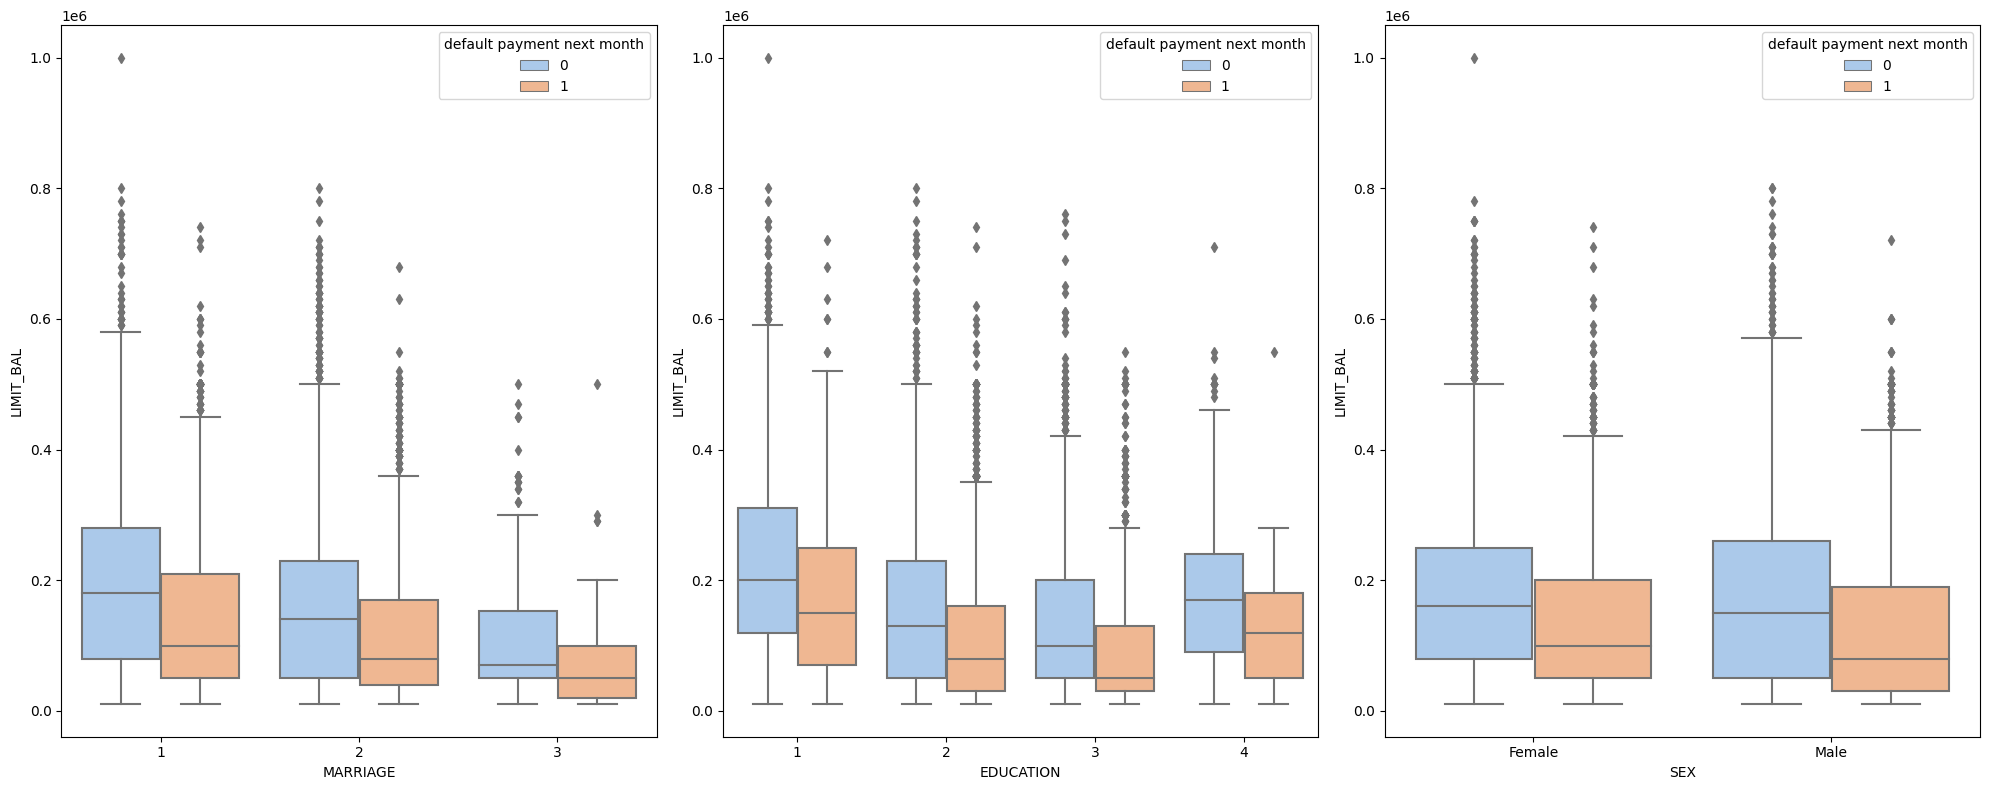

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(ax=axes[2], x='SEX', hue='default payment next month', y='LIMIT_BAL', data=df1)
sns.boxplot(ax=axes[1], x='EDUCATION', hue='default payment next month', y='LIMIT_BAL', data=df1)
sns.boxplot(ax=axes[0], x='MARRIAGE', hue='default payment next month', y='LIMIT_BAL', data=df1)
plt.tight_layout()
plt.show()

These graphs show spread of data for Marriage, Education, Sex Vs. Limit Balance with respect to two user groups in our data.

The position of median for most of the groups suggests that the lower half of the data is more densely packed.

For all three visualizations non-defaulters have the maximum number of outliers.

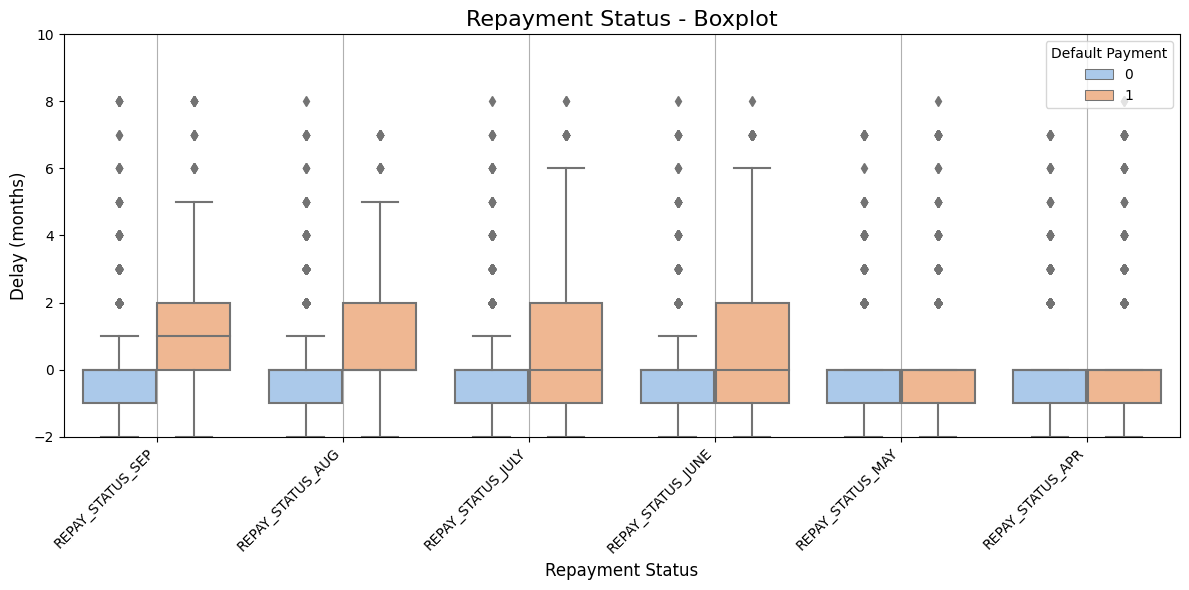

In [28]:
sns.set_palette(palette='pastel')
repay_status_cols = ['REPAY_STATUS_SEP', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JULY',
                     'REPAY_STATUS_JUNE', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR']

repay_status_df1 = df1[['default payment next month'] + repay_status_cols]

repay_status = pd.melt(repay_status_df1,
                       id_vars="default payment next month",
                       var_name="Repayment Status",
                       value_name='Delay (months)')

plt.figure(figsize=(12, 6))

ax = sns.boxplot(y="Delay (months)", x="Repayment Status", hue="default payment next month", data=repay_status)
plt.ylim([-2, 10])
plt.title('Repayment Status - Boxplot', fontsize=16)
plt.xlabel('Repayment Status', fontsize=12)
plt.ylabel('Delay (months)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Default Payment', loc='upper right')

ax.xaxis.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

The above graph shows plots of Repay status for 6 months (April, May, June, July, August, September) with respect to Delay.

There are more outliers for group 0, with more dense distribution towards lower delay values.

<ipython-input-29-1b518e26605d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


<Axes: xlabel='0', ylabel='0'>

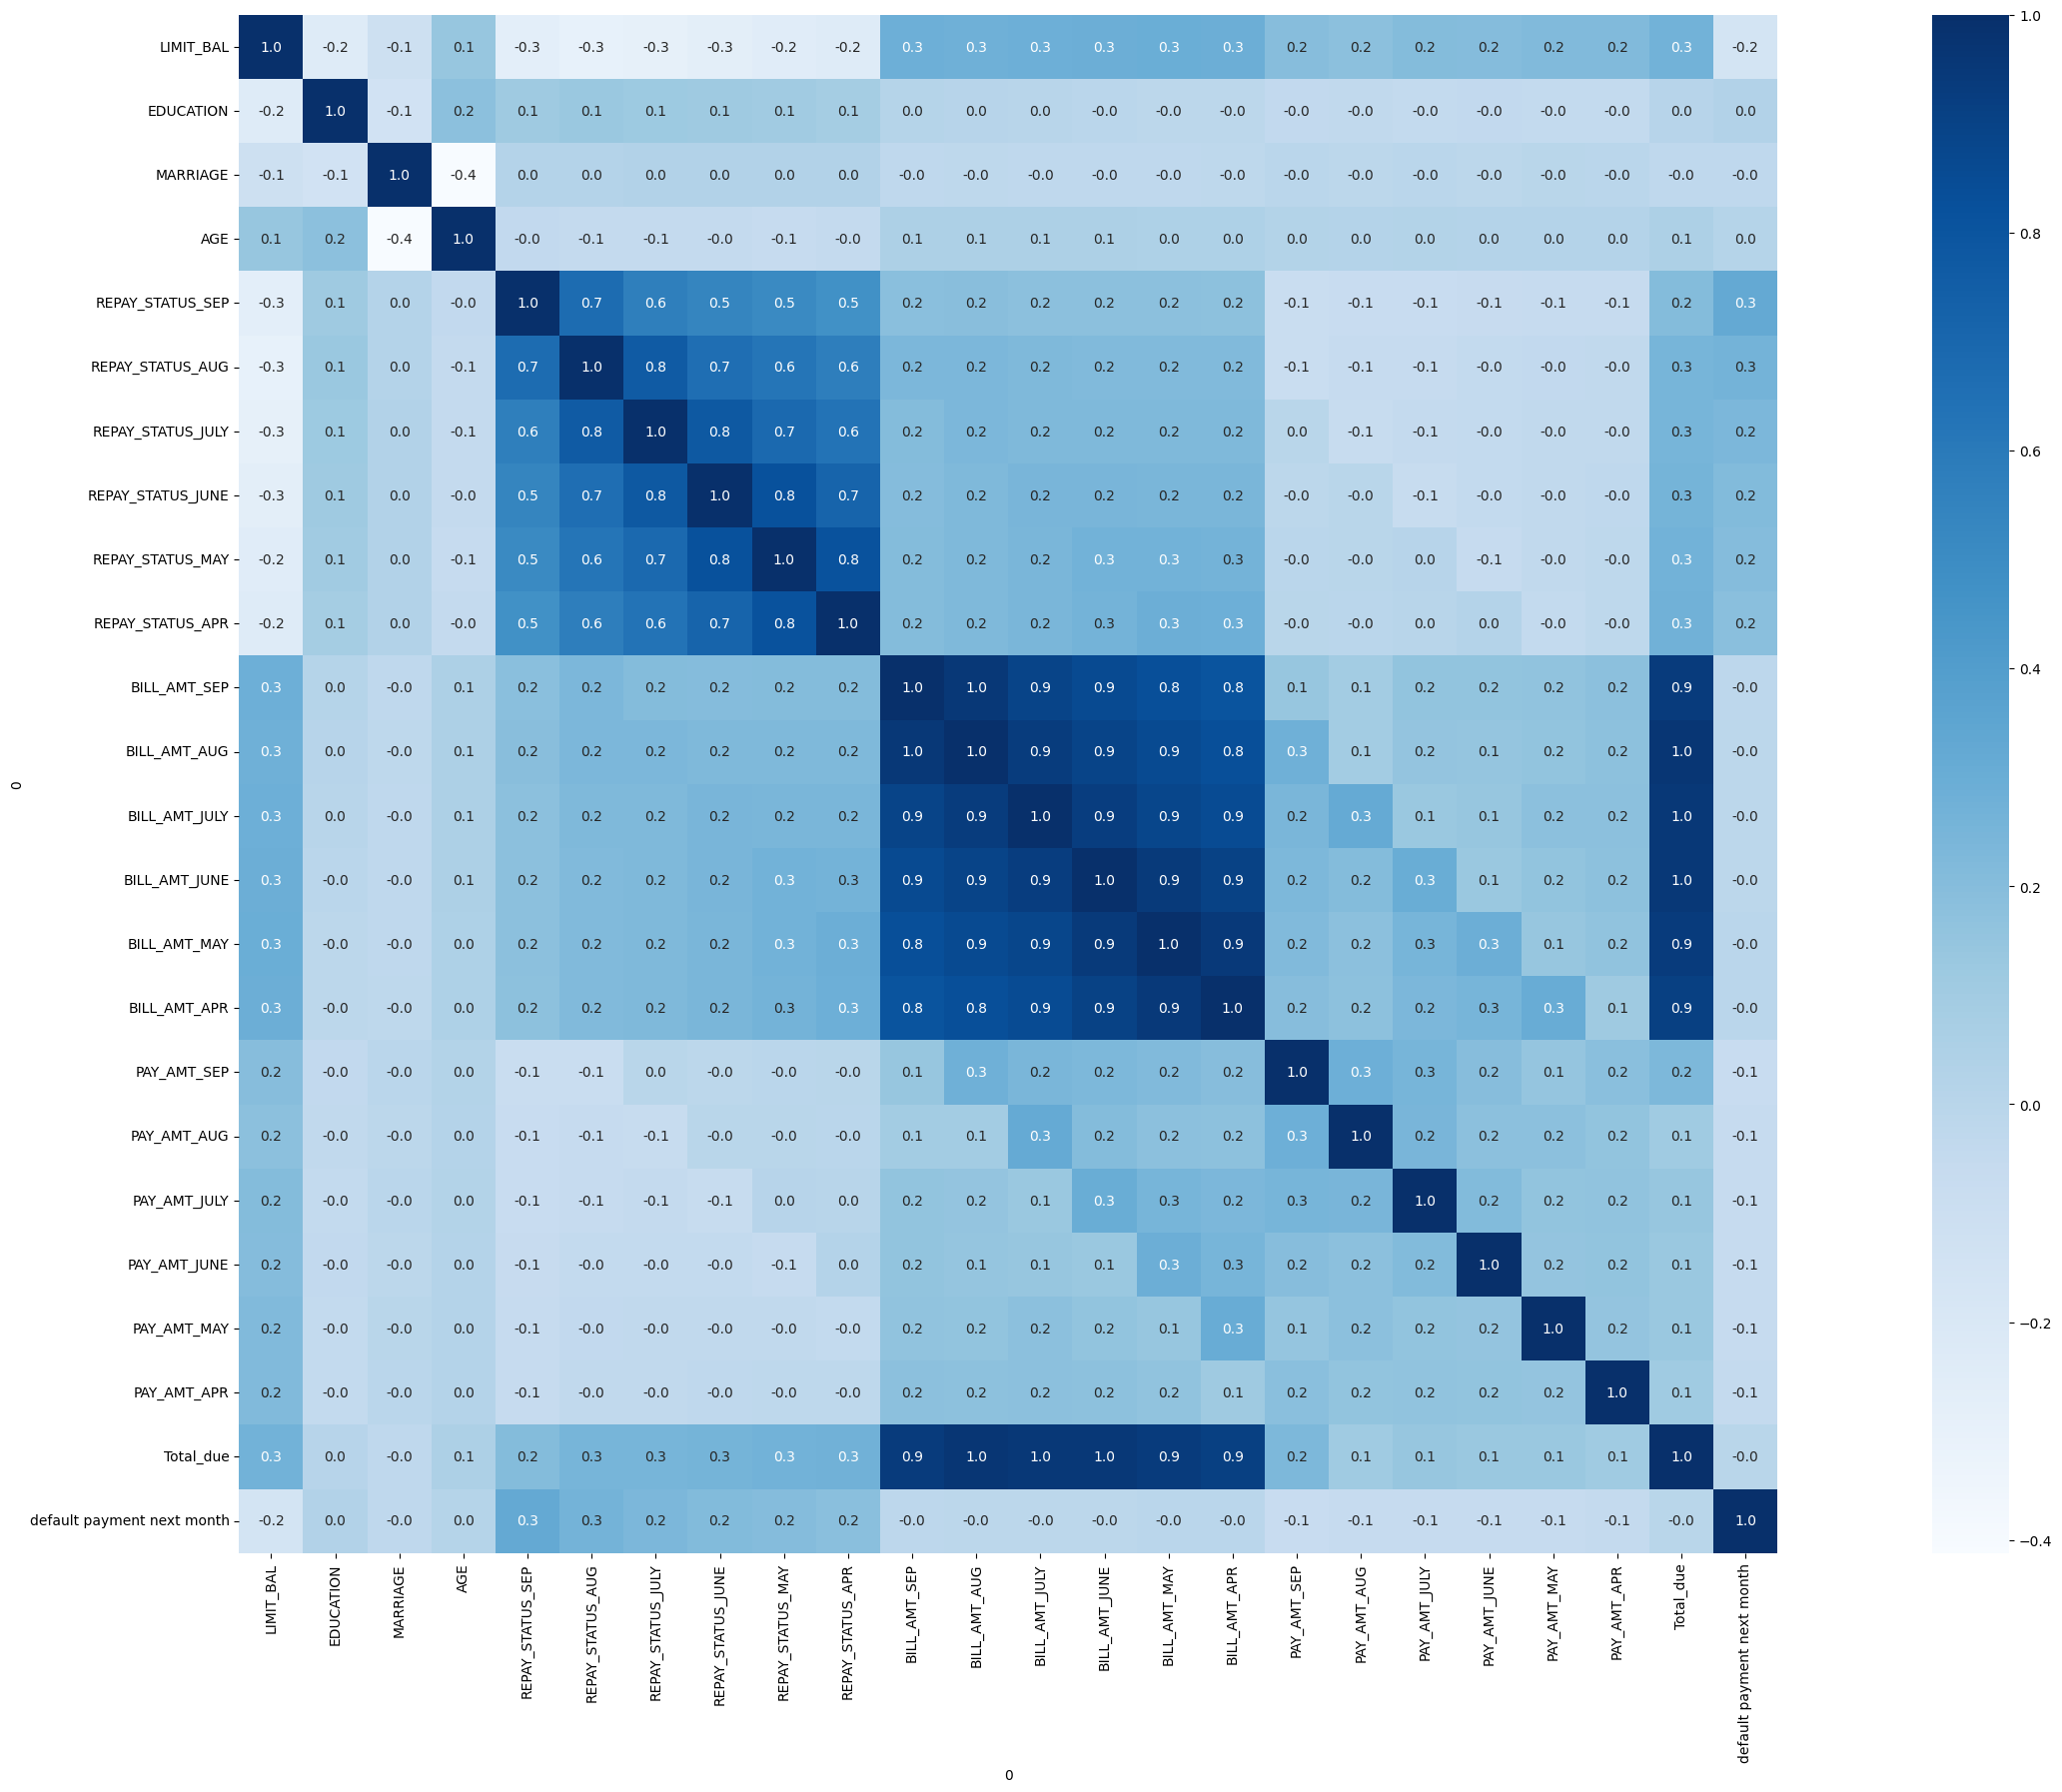

In [29]:
correlation = df1.corr()
plt.subplots(figsize=(40,20))
sns.heatmap( correlation, square=True, annot=True,cmap='Blues', fmt=".1f" )

The heatmap shows visual correlation matrices between all the variables in the data.

Hence, we can easily identify relationships between variables. High or low correlation coefficients are visible by lighter or darker color intensities.



<ipython-input-30-8db4e3b2258c>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = X1.corrwith(df1['default payment next month'])


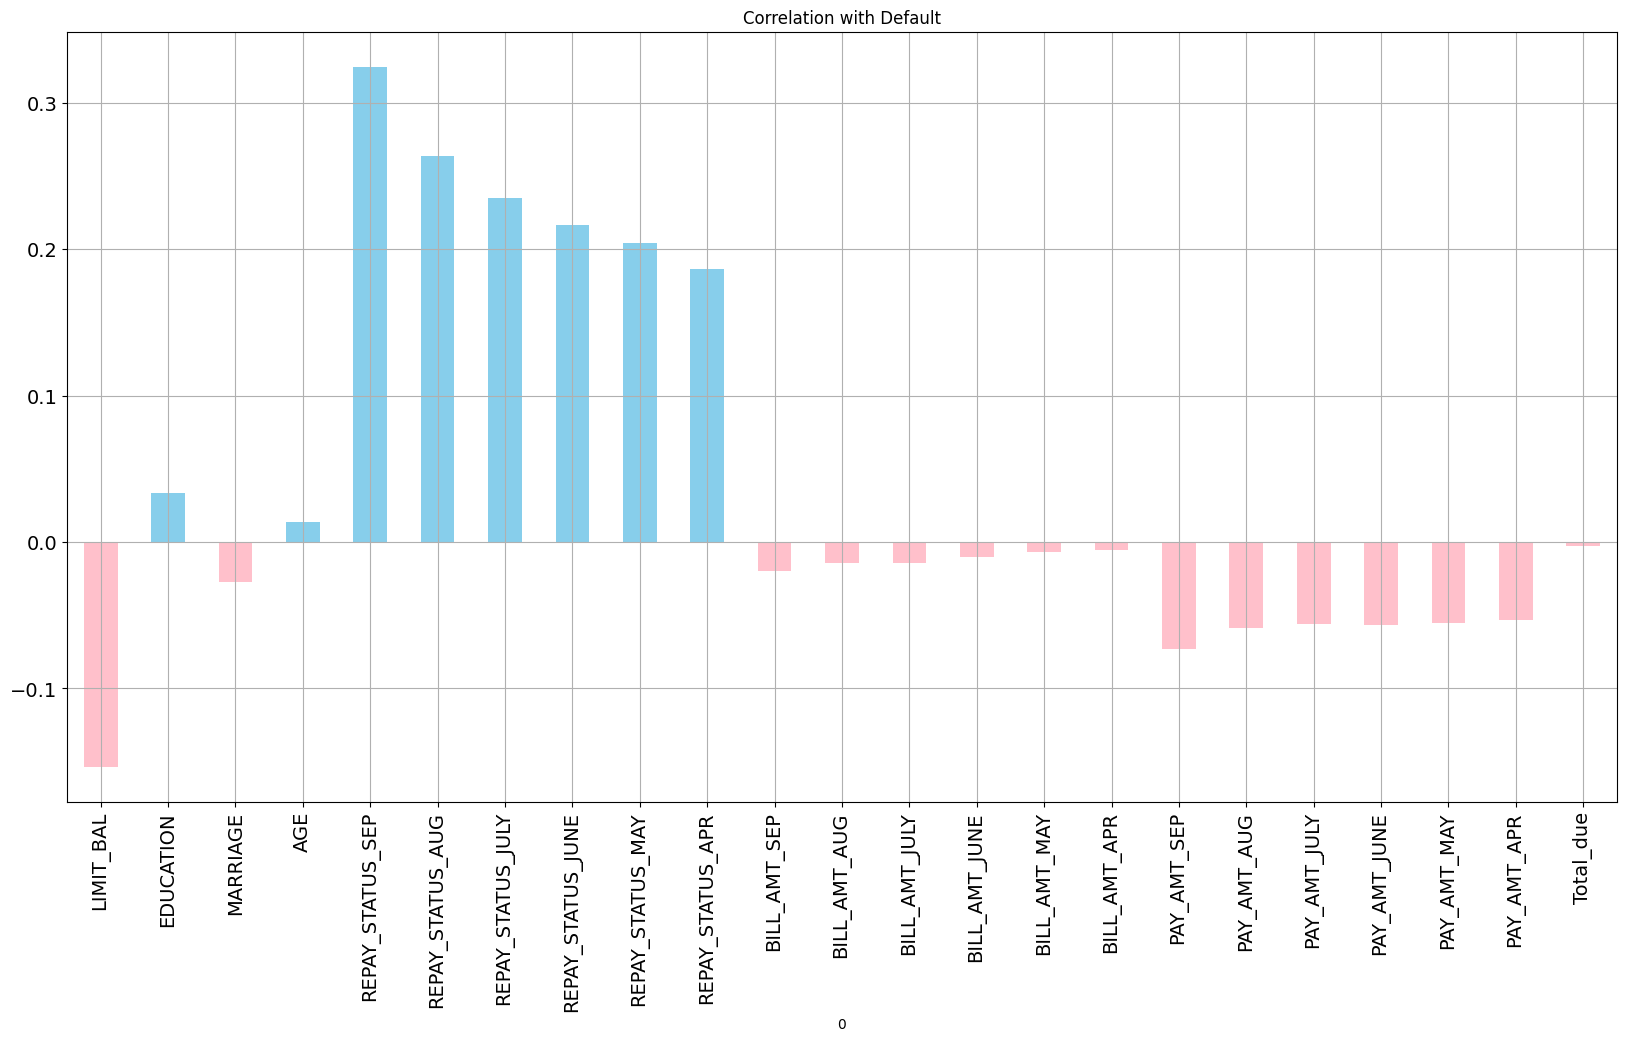

In [30]:
X1 = df1.drop(['default payment next month'], axis=1)
correlation = X1.corrwith(df1['default payment next month'])

colors = correlation.apply(lambda x1: '#87CEEB' if x1 >= 0 else 'pink')

correlation.plot.bar(figsize=(20, 10), title="Correlation with Default", fontsize=14,
                     color=colors, rot=90, grid=True)

plt.show()

This graph shoes correlation of Default variable with all the variables in data.

Here, we can observe that Repay Status for Sept has the highest positive correlation and Limit_Bal has the highest negative correlation.

## **Data Transformations**

In [31]:
columns_to_encode = ['EDUCATION', 'MARRIAGE']

for column in columns_to_encode:
    one_hot_encoded = pd.get_dummies(df[column], prefix=column)
    col_index = df.columns.get_loc(column)
    for col in one_hot_encoded.columns:
        df.insert(col_index, col, one_hot_encoded[col])
    df = df.drop(column, axis=1)
df

,LIMIT_BAL,SEX,EDUCATION_4,EDUCATION_3,EDUCATION_2,EDUCATION_1,MARRIAGE_3,MARRIAGE_2,MARRIAGE_1,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,Total_due,default payment next month
1,20000,Female,0,0,1,0,0,0,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7015.0,1
2,120000,Female,0,0,1,0,0,1,0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,12077.0,1
3,90000,Female,0,0,1,0,0,1,0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,93671.0,0
4,50000,Female,0,0,1,0,0,0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,226946.0,0
5,50000,Male,0,0,1,0,0,0,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,54290.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,Male,0,1,0,0,0,0,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,699799.0,0
29997,150000,Male,0,1,0,0,0,1,0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,10366.0,0
29998,30000,Male,0,0,1,0,0,1,0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,39196.0,1
29999,80000,Male,0,1,0,0,0,0,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,291230.0,1


In [32]:
gender_map = {'Male': 0, 'Female': 1}

df['SEX'] = df['SEX'].map(gender_map)

In [33]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION_4,EDUCATION_3,EDUCATION_2,EDUCATION_1,MARRIAGE_3,MARRIAGE_2,MARRIAGE_1,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,Total_due,default payment next month
1,20000,1,0,0,1,0,0,0,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7015.0,1
2,120000,1,0,0,1,0,0,1,0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,12077.0,1
3,90000,1,0,0,1,0,0,1,0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,93671.0,0
4,50000,1,0,0,1,0,0,0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,226946.0,0
5,50000,0,0,0,1,0,0,0,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,54290.0,0
6,50000,0,0,0,0,1,0,1,0,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,235342.0,0
7,500000,0,0,0,0,1,0,1,0,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,2653836.0,0
8,100000,1,0,0,1,0,0,1,0,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,9455.0,0
9,140000,1,0,1,0,0,0,0,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,65109.0,0
10,20000,0,0,1,0,0,0,1,0,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,12790.0,0


In [34]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION_4', 'EDUCATION_3', 'EDUCATION_2',
       'EDUCATION_1', 'MARRIAGE_3', 'MARRIAGE_2', 'MARRIAGE_1', 'AGE',
       'REPAY_STATUS_SEP', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JULY',
       'REPAY_STATUS_JUNE', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR',
       'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'Total_due', 'default payment next month'],
      dtype='object', name=0)

In [35]:
columns_to_standardize = ['LIMIT_BAL', 'AGE','REPAY_STATUS_SEP', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JULY','REPAY_STATUS_JUNE', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Total_due']

means = df[columns_to_standardize].mean()
stds = df[columns_to_standardize].std()

df[columns_to_standardize] = (df[columns_to_standardize] - means) / stds

df

,LIMIT_BAL,SEX,EDUCATION_4,EDUCATION_3,EDUCATION_2,EDUCATION_1,MARRIAGE_3,MARRIAGE_2,MARRIAGE_1,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,Total_due,default payment next month
1,-1.136701,1,0,0,1,0,0,0,1,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,-1.486016,-0.642490,-0.647388,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377,-0.656743,1
2,-0.365974,1,0,0,1,0,0,1,0,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,1.992282,-0.659208,-0.666735,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875,-0.643036,1
3,-0.597192,1,0,0,1,0,0,1,0,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.298555,-0.493891,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122,-0.422082,0
4,-0.905483,1,0,0,1,0,0,0,1,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.057490,-0.013292,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126,-0.061177,0
5,-0.905483,0,0,0,1,0,0,0,1,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,0.253133,-0.578608,-0.611308,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183,-0.528724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404752,0,0,1,0,0,0,0,1,0.381269,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,1.870348,2.018102,2.326651,0.695462,-0.149257,-0.384386,0.171247,0.611038,-0.012647,-0.113562,0.013131,-0.237126,1.219295,0
29997,-0.134756,0,0,1,0,0,0,1,0,0.815207,-0.874977,-0.723558,-0.696652,-0.666588,0.234913,0.253133,-0.672775,-0.665288,-0.627419,-0.532915,-0.577682,-0.652713,-0.231028,-0.103953,0.214252,-0.299823,-0.314131,-0.293377,-0.647669,0
29998,-1.059629,0,0,0,1,0,0,1,0,0.164300,3.574208,2.617611,1.809891,-0.666588,0.234913,0.253133,-0.647216,-0.643820,-0.638148,-0.347955,-0.324512,-0.327681,-0.341936,-0.256985,0.952709,-0.039964,-0.183226,-0.118999,-0.569598,1
29999,-0.674265,0,0,1,0,0,0,0,1,0.598238,0.904697,-0.723558,0.138862,0.188743,0.234913,-0.616441,-0.717970,0.410262,0.422366,0.147841,-0.468055,0.169128,4.844235,-0.109031,-0.229891,-0.185117,3.152484,-0.191900,0.112902,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION_4                 30000 non-null  uint8  
 3   EDUCATION_3                 30000 non-null  uint8  
 4   EDUCATION_2                 30000 non-null  uint8  
 5   EDUCATION_1                 30000 non-null  uint8  
 6   MARRIAGE_3                  30000 non-null  uint8  
 7   MARRIAGE_2                  30000 non-null  uint8  
 8   MARRIAGE_1                  30000 non-null  uint8  
 9   AGE                         30000 non-null  float64
 10  REPAY_STATUS_SEP            30000 non-null  float64
 11  REPAY_STATUS_AUG            30000 non-null  float64
 12  REPAY_STATUS_JULY           30000 non-null  float64
 13  REPAY_STATUS_JUNE           300

In [37]:
category_counts = df['default payment next month'].value_counts()
category_counts

0    23364
1     6636
Name: default payment next month, dtype: int64

In [38]:
df.shape

(30000, 30)

In [39]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

minority_class = y[y == 0]
majority_class = y[y == 1]

sampled_minority = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

sampled_df = pd.concat([X.loc[sampled_minority.index], X.loc[majority_class.index]])
sampled_df['default payment next month'] = pd.concat([sampled_minority, majority_class])

sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

sampled_df

,LIMIT_BAL,SEX,EDUCATION_4,EDUCATION_3,EDUCATION_2,EDUCATION_1,MARRIAGE_3,MARRIAGE_2,MARRIAGE_1,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,Total_due,default payment next month
0,-0.597192,1,0,0,1,0,0,0,1,-0.595092,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,-1.486016,-0.695630,-0.690972,-0.677917,-0.672486,-0.663047,-0.652713,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,-0.675740,0
1,-0.674265,1,0,0,1,0,0,1,0,-1.137515,0.904697,1.782318,0.138862,0.188743,1.999846,0.253133,-0.274096,-0.265829,-0.220639,-0.148119,-0.172531,-0.132749,-0.341936,-0.170183,-0.157988,-0.308057,-0.117774,-0.237126,-0.190772,1
2,-0.982556,0,0,0,0,1,0,1,0,-0.703576,0.904697,1.782318,1.809891,1.899404,1.999846,1.992282,-0.183909,-0.174279,-0.101387,-0.066590,-0.013691,0.007678,-0.341936,-0.092061,-0.296796,-0.231459,-0.314131,-0.293377,-0.060421,0
3,-1.213774,1,0,0,1,0,0,0,1,0.489753,0.014860,0.111734,-0.696652,0.188743,0.234913,0.253133,-0.571574,-0.690972,-0.650347,-0.624750,-0.597058,-0.486780,-0.341936,-0.174002,-0.228641,-0.244226,-0.248679,-0.237126,-0.616435,0
4,0.558898,0,0,0,0,1,0,0,1,0.055815,0.904697,-1.558850,-1.532166,-1.521918,-1.530021,-1.486016,-0.695630,-0.690972,-0.677917,-0.672486,-0.663047,-0.652713,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,-0.675740,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,-0.905483,1,0,1,0,0,0,1,0,1.574599,0.904697,-1.558850,-1.532166,-1.521918,-1.530021,-1.486016,-0.695630,-0.690972,-0.677917,-0.672486,-0.663047,-0.652713,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,-0.675740,1
13268,1.021334,0,0,0,0,1,0,0,1,0.489753,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,-1.486016,-0.618915,-0.611603,-0.596460,-0.583900,-0.573142,-0.318933,-0.000880,-0.011812,0.026882,0.050422,1.012718,-0.293377,-0.631321,0
13269,2.254497,0,0,0,0,1,0,1,0,-0.486607,0.014860,0.111734,1.809891,0.188743,0.234913,0.253133,-0.634071,-0.564198,-0.557988,-0.480702,-0.453432,-0.444550,-0.039943,-0.256942,-0.012704,-0.244162,-0.313935,-0.252145,-0.519723,0
13270,-1.059629,0,0,0,0,1,0,1,0,1.466114,0.014860,0.111734,0.138862,1.899404,0.234913,0.253133,-0.354166,-0.328043,-0.257986,-0.232944,-0.327670,-0.307565,-0.251374,-0.061680,-0.296796,-0.250609,-0.248679,-0.180875,-0.290074,0


In [40]:
sampled_df['default payment next month'].value_counts()

0    6636
1    6636
Name: default payment next month, dtype: int64

In [41]:
sampled_df.shape

(13272, 30)

In [42]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   13272 non-null  float64
 1   SEX                         13272 non-null  int64  
 2   EDUCATION_4                 13272 non-null  uint8  
 3   EDUCATION_3                 13272 non-null  uint8  
 4   EDUCATION_2                 13272 non-null  uint8  
 5   EDUCATION_1                 13272 non-null  uint8  
 6   MARRIAGE_3                  13272 non-null  uint8  
 7   MARRIAGE_2                  13272 non-null  uint8  
 8   MARRIAGE_1                  13272 non-null  uint8  
 9   AGE                         13272 non-null  float64
 10  REPAY_STATUS_SEP            13272 non-null  float64
 11  REPAY_STATUS_AUG            13272 non-null  float64
 12  REPAY_STATUS_JULY           13272 non-null  float64
 13  REPAY_STATUS_JUNE           132

In [43]:
sampled_df.corr()

,LIMIT_BAL,SEX,EDUCATION_4,EDUCATION_3,EDUCATION_2,EDUCATION_1,MARRIAGE_3,MARRIAGE_2,MARRIAGE_1,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JULY,REPAY_STATUS_JUNE,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,Total_due,default payment next month
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,1.000000,0.035594,0.009081,-0.143284,-0.151133,0.272650,-0.050095,-0.087637,0.099043,0.142973,-0.285290,-0.320398,-0.311469,-0.294024,-0.271045,-0.258828,0.300064,0.290330,0.288066,0.300978,0.311997,0.302112,0.195899,0.150802,0.207555,0.203998,0.200698,0.220182,0.283747,-0.189168
SEX,0.035594,1.000000,0.016251,-0.006350,0.015752,-0.014922,-0.004224,-0.029984,0.030975,-0.089692,-0.056928,-0.070152,-0.070336,-0.062597,-0.065443,-0.047847,-0.036388,-0.034840,-0.021188,-0.023099,-0.020504,-0.019121,0.002250,0.009828,-0.016731,-0.005237,-0.003671,0.002105,-0.028103,-0.044254
EDUCATION_4,0.009081,0.016251,1.000000,-0.045728,-0.095102,-0.071080,-0.004526,-0.019167,0.020213,0.021012,-0.040364,-0.040542,-0.041091,-0.031509,-0.032220,-0.034422,0.028380,0.019669,0.019574,0.011917,0.003642,-0.004985,0.010281,0.014773,0.027562,-0.000564,0.001103,0.025608,0.011899,-0.048964
EDUCATION_3,-0.143284,-0.006350,-0.045728,1.000000,-0.439636,-0.328587,0.055319,-0.130266,0.117972,0.232512,0.054994,0.063276,0.057099,0.049749,0.039614,0.030387,-0.032470,-0.030805,-0.032170,-0.040853,-0.042016,-0.041657,-0.010381,-0.014523,-0.023142,-0.017517,-0.027482,-0.033652,-0.034259,0.031366
EDUCATION_2,-0.151133,0.015752,-0.095102,-0.439636,1.000000,-0.683372,-0.001604,-0.047778,0.048203,-0.096731,0.105938,0.119142,0.115374,0.112288,0.104731,0.103645,0.033733,0.032921,0.026184,0.030166,0.029537,0.033762,-0.030879,-0.035553,-0.038531,-0.005872,-0.016804,-0.022813,0.038790,0.048421
EDUCATION_1,0.272650,-0.014922,-0.071080,-0.328587,-0.683372,1.000000,-0.041747,0.158954,-0.149756,-0.088784,-0.147580,-0.168130,-0.159081,-0.151919,-0.135661,-0.126653,-0.015475,-0.014141,-0.005912,-0.001556,0.001764,-0.001189,0.038793,0.046117,0.053514,0.020372,0.039563,0.045757,-0.015950,-0.066100
MARRIAGE_3,-0.050095,-0.004224,-0.004526,0.055319,-0.001604,-0.041747,1.000000,-0.118409,-0.106800,0.086542,0.009170,0.001769,0.007970,0.014813,0.005507,0.004717,-0.016228,-0.021575,-0.020177,-0.022013,-0.021997,-0.019686,-0.007376,-0.003051,-0.015231,-0.008378,-0.001299,-0.009247,-0.020446,0.005360
MARRIAGE_2,-0.087637,-0.029984,-0.019167,-0.130266,-0.047778,0.158954,-0.118409,1.000000,-0.974640,-0.468385,0.009117,0.010837,0.019708,0.008138,0.020758,0.022667,-0.026376,-0.021436,-0.027897,-0.024005,-0.024056,-0.022223,-0.006290,-0.014613,-0.007788,-0.009129,-0.006506,-0.002113,-0.024490,-0.031820
MARRIAGE_1,0.099043,0.030975,0.020213,0.117972,0.048203,-0.149756,-0.106800,-0.974640,1.000000,0.449502,-0.011195,-0.011250,-0.021531,-0.011487,-0.022026,-0.023760,0.030069,0.026326,0.032481,0.028998,0.029045,0.026689,0.007961,0.015320,0.011230,0.011029,0.006808,0.004200,0.029130,0.030654


## **Dataset Splitting**

In [44]:
X = sampled_df.drop('default payment next month', axis=1)
y = sampled_df['default payment next month']

import numpy as np
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## **Models Development**

In [45]:
!pip install memory-profiler

**Logistic Regression (Base Model)**

In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataclasses import dataclass
from math import log
from mpl_toolkits.mplot3d import Axes3D
import time

%load_ext memory_profiler

@dataclass
class LogisticRegression:
    alpha_val: float
    maxIterations: int
    tolerance: float
    theta: np.ndarray = None

    def __post_init__(self):
        pass

    def read_dataset(self, X_train, X_test, y_train, y_test):
        self.y_train = y_train
        self.y_test = y_test
        self.X_train = X_train
        self.X_test = X_test

    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def cost_function(self, X, y):
        neg_log_likelihood = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.theta))) - X.dot(self.theta).dot(y)
        cost_val = neg_log_likelihood.sum()
        return cost_val

    def cost_derivation(self, X, y):
        sig = self.sigmoid(X.dot(self.theta))
        return (sig - y).dot(X)

    def gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.maxIterations), colour='red'):
            self.theta = self.theta - self.alpha_val * self.cost_derivation(X, y)
            curr_error = self.cost_function(X, y)
            errors.append(curr_error)
            if np.abs(prev_error - curr_error) < self.tolerance:
                print("The model stopped learning")
                break
            prev_error = curr_error

    def predict(self, X):
        sig_val = self.sigmoid(X.dot(self.theta))
        return np.around(sig_val)

    def metrics_evaluation(self, y, y_hat):
        y = y == 1
        y_hat = y_hat == 1

        accuracy = (y == y_hat).mean()
        specificity = ((~y) & (~y_hat)).sum() / (~y).sum()
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f_score = 2 * (precision * recall) / (precision + recall)

        return precision, recall, f_score, accuracy, specificity

    def runModel(self):
        self.read_dataset(X_train, X_test, y_train, y_test)

        print("Solving using gradient descent")
        self.theta = np.zeros(self.X_train.shape[1], dtype=np.float64)
        self.gradient_descent(self.X_train, self.y_train)

        y_hat_test = self.predict(self.X_test)

        self.bias_square1 = np.mean((self.y_train - self.predict(self.X_train)) ** 2)

        self.variance1 = np.mean((self.predict(self.X_train) - np.mean(self.predict(self.X_train))) ** 2)

        self.noise1 = np.mean((self.y_test - y_hat_test) ** 2)

        self.expected_loss1 = self.bias_square1 + self.variance1 + self.noise1

        self.precision1, self.recall1, self.f_score1, self.accuracy1, self.specificity1 = self.metrics_evaluation(self.y_test, y_hat_test)

        print("\n\n")
        print("\nPrecision: {:.3f}".format(np.round(self.precision1*100, 3)))
        print("Recall: {:.3f}".format(np.round(self.recall1*100, 3)))
        print("Accuracy: {:.3f}".format(np.round(self.accuracy1*100, 3)))
        print("Specificity: {:.3f}".format(np.round(self.specificity1*100, 3)))
        print("F1-Score: {:.3f}".format(np.round(self.f_score1*100, 3)))
        print("\n")

        print("\nBias: {:.3f}".format(self.bias_square1))
        print("Variance: {:.3f}".format(self.variance1))
        print("Noise: {:.3f}".format(self.noise1))
        print("Expected Loss: {:.3f}".format(self.expected_loss1))
        print("\n")

In [47]:
lr = LogisticRegression(tolerance=0.001, alpha_val=0.001, maxIterations=5000)
start_time = time.time()
%memit lr.runModel()
end_time = time.time()
lr_elapsed_time = end_time - start_time
print(f"\n\nLogistic Regression - Elapsed time: {np.round(lr_elapsed_time,3)} seconds")

Solving using gradient descent


100%|██████████| 5000/5000 [01:04<00:00, 77.03it/s]






Precision: 61.990
Recall: 59.881
Accuracy: 61.212
Specificity: 62.568
F1-Score: 60.917



Bias: 0.386
Variance: 0.249
Noise: 0.388
Expected Loss: 1.023


peak memory: 368.43 MiB, increment: 1.18 MiB


Logistic Regression - Elapsed time: 65.243 seconds


**Hard-Margin SVM**

In [48]:
@dataclass
class HardMarginSVM:

    def __init__(self, alpha = 0.001, max_iter = 700):
        self.alpha = alpha
        self.max_iter = max_iter
        self.w = None
        self.b = None

    def read_dataset(self, X_train, X_test, y_train, y_test):
        self.y_train = y_train
        self.y_test = y_test
        self.X_train = X_train
        self.X_test = X_test

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0
        self.X_train = X
        self.y_train = y

        for _ in tqdm(range(self.max_iter), desc="Hard-Margin SVM Progress", colour='red'):
            for idx in range(n_samples):
                x_i = X[idx]
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if not condition:
                    self.w += self.alpha * y_[idx] * x_i
                    self.b += self.alpha * y_[idx]

    def predict(self, X, Y):
        approx = np.dot(X, self.w) + self.b
        y_hat_test = np.sign(approx)
        return y_hat_test

    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)

        acc = (y == y_hat).sum() / y.size
        prec = (y & y_hat).sum() / y_hat.sum() if y_hat.sum() > 0 else 0
        rec = (y & y_hat).sum() / y.sum() if y.sum() > 0 else 0
        spec = ((~y) & (~y_hat)).sum() / (~y).sum() if (~y).sum() > 0 else 0
        f1_score = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

        return prec, rec, f1_score, acc, spec


    def runModel(self):

        self.read_dataset(X_train, X_test, y_train, y_test)

        y_hat_test = self.predict(self.X_test, self.y_test)

        self.bias_square2 = np.mean((self.y_train - self.predict(self.X_train, self.y_train)) ** 2)

        self.variance2 = np.mean((self.predict(self.X_train, self.y_train) - np.mean(self.predict(self.X_train, self.y_train))) ** 2)

        self.noise2 = np.mean((self.y_test - y_hat_test) ** 2)

        self.expected_loss2 = self.bias_square2 + self.variance2 + self.noise2

        self.precision2, self.recall2, self.f_score2, self.accuracy2, self.specificity2 = self.evaluate(self.y_test, y_hat_test)


        print("\n")
        print("\nPrecision: {:.3f}".format(np.round(self.precision2*100, 3)))
        print("Recall: {:.3f}".format(np.round(self.recall2*100, 3)))
        print("Accuracy: {:.3f}".format(np.round(self.accuracy2*100, 3)))
        print("Specificity: {:.3f}".format(np.round(self.specificity2*100, 3)))
        print("F1-Score: {:.3f}".format(np.round(self.f_score2*100, 3)))
        print("\n")

        print("Bias: {:.3f}".format(self.bias_square2))
        print("Variance: {:.3f}".format(self.variance2))
        print("Noise: {:.3f}".format(self.noise2))
        print("Expected Loss: {:.3f}".format(self.expected_loss2))
        print("\n")

In [49]:
svm_model = HardMarginSVM()

start_time = time.time()

%memit svm_model.fit(np.array(X_train), np.array(y_train))

%memit svm_model.predict(np.array(X_test), np.array(y_test))

%memit svm_model.runModel()

end_time = time.time()
hm_svm_elapsed_time = end_time - start_time
print(f"\n\nHard-Margin SVM - Elapsed time: {np.round(hm_svm_elapsed_time,3)} seconds")

Hard-Margin SVM Progress: 100%|██████████| 700/700 [01:14<00:00,  9.40it/s]


peak memory: 368.48 MiB, increment: 0.04 MiB
peak memory: 368.48 MiB, increment: 0.00 MiB



Precision: 78.193
Recall: 51.164
Accuracy: 68.143
Specificity: 85.453
F1-Score: 61.855


Bias: 1.454
Variance: 0.889
Noise: 1.481
Expected Loss: 3.825


peak memory: 368.50 MiB, increment: 0.02 MiB


Hard-Margin SVM - Elapsed time: 75.452 seconds


**Gaussian Naive Bayes**

In [50]:
from scipy.stats import norm
@dataclass
class GaussianNaiveBayes:

    smoothing_factor: float = 1.0

    def __post_init__(self):
        self.y_train = y_train
        self.y_test = y_test
        self.X_train = X_train
        self.X_test = X_test
        self.fit()

    def fit_distribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        std_smoothed = np.sqrt(std**2 + self.smoothing_factor)
        return norm(mean, std_smoothed)

    def get_probability(self, X, dist_cols, prior):
        probabilities = [dist_col.pdf(X[i]) for i, dist_col in enumerate(dist_cols)]
        return prior * np.prod(probabilities)

    def fit(self):
        X1_train = self.X_train[self.y_train == 1].values
        X0_train = self.X_train[self.y_train == 0].values

        self.prior1 = (X1_train.shape[0] + self.smoothing_factor) / (self.X_train.shape[0] + (2 * self.smoothing_factor))
        self.prior0 = (X0_train.shape[0] + self.smoothing_factor) / (self.X_train.shape[0] + (2 * self.smoothing_factor))

        num_features = self.X_train.shape[1]

        self.dist_X1 = [self.fit_distribution(X1_train[:, i]) for i in range(num_features)]
        self.dist_X0 = [self.fit_distribution(X0_train[:, i]) for i in range(num_features)]

    def predict(self, X):
        y_hat = []
        for i in tqdm(range(X.shape[0]), desc = "Gaussian Naive Bayes Progress", colour = 'red'):
            x = X.iloc[i]
            #y = self.y_test.iloc[i]
            prob_1 = self.get_probability(x, self.dist_X1, self.prior1)
            prob_0 = self.get_probability(x, self.dist_X0, self.prior0)
            j = np.argmax([prob_0, prob_1])
            y_hat.append(j)
            #print('P(y=0 | %s) = %.4f'%(x, prob_0))
            #print('P(y=1 | %s) = %.4f'%(x, prob_1))
            #print("Model predicted {} and class was {}".format(j, y))
        return np.array(y_hat)

    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        acc = (y == y_hat).sum() / y.size
        prec = (y & y_hat).sum() / y_hat.sum() if y_hat.sum() > 0 else 0
        rec = (y & y_hat).sum() / y.sum() if y.sum() > 0 else 0
        spec = ((~y) & (~y_hat)).sum() / (~y).sum() if (~y).sum() > 0 else 0
        f1_score = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

        return prec, rec, f1_score, acc, spec

    def runModel(self):

        y_hat_test = self.predict(self.X_test)

        self.bias_square3 = np.mean((self.y_train - self.predict(self.X_train)) ** 2)

        self.variance3 = np.mean((self.predict(self.X_train) - np.mean(self.predict(self.X_train))) ** 2)

        self.noise3 = np.mean((self.y_test - y_hat_test) ** 2)

        self.expected_loss3 = self.bias_square3 + self.variance3 + self.noise3

        self.precision3, self.recall3, self.f_score3, self.accuracy3, self.specificity3 = self.evaluate(self.y_test, y_hat_test)

        print("\n")
        print("\nPrecision: {:.3f}".format(np.round(self.precision3 * 100, 3)))
        print("Recall: {:.3f}".format(np.round(self.recall3 * 100, 3)))
        print("Accuracy: {:.3f}".format(np.round(self.accuracy3 * 100, 3)))
        print("Specificity: {:.3f}".format(np.round(self.specificity3 * 100, 3)))
        print("F1-Score: {:.3f}".format(np.round(self.f_score3 * 100, 3)))
        print("\n")

        print("Bias: {:.3f}".format(self.bias_square3))
        print("Variance: {:.3f}".format(self.variance3))
        print("Noise: {:.3f}".format(self.noise3))
        print("Expected Loss: {:.3f}".format(self.expected_loss3))
        print("\n")

In [51]:
gnb = GaussianNaiveBayes()
start_time = time.time()
%memit gnb.runModel()
end_time = time.time()
gnb_elapsed_time = end_time - start_time
print(f"\n\nGaussian Naive Bayes - Elapsed time: {np.round(gnb_elapsed_time,3)} seconds")

Gaussian Naive Bayes Progress: 100%|██████████| 9954/9954 [01:38<00:00, 101.44it/s]





Precision: 58.410
Recall: 79.403
Accuracy: 61.061
Specificity: 42.362
F1-Score: 67.308


Bias: 0.404
Variance: 0.216
Noise: 0.389
Expected Loss: 1.009


peak memory: 368.62 MiB, increment: 0.08 MiB


Gaussian Naive Bayes - Elapsed time: 323.485 seconds


**Neural Networks (Multi-Layer Perceptron Classifier using TensorFlow, Keras)**

In [52]:
!pip install keras
!pip install tensorflow

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

start_time = time.time()

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

%memit model.fit(X_train, y_train, epochs=40, batch_size=200, validation_split=0.3)

def calculate_precision(y_true, y_pred):
    y_true = np.squeeze(y_true)
    y_pred = np.squeeze(y_pred)

    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))

    precision = true_positives / (true_positives + false_positives + 1e-10)
    return precision

def generate_confusion_matrix(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[true_negatives, false_positives],
                                [false_negatives, true_positives]])
    return confusion_matrix

print("\n\n")

%memit
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy4 = np.mean(y_pred.flatten() == y_test)
print("\n\n")
print(f'Accuracy: {np.round(accuracy4*100,3)}')

precision4 = calculate_precision(y_test, y_pred)
print(f'Precision: {np.round(precision4*100)}')

recall4 = np.sum((y_test == 1) & (y_pred.flatten() == 1)) / np.sum(y_test == 1)
print(f'Recall (True Positive Rate): {np.round(recall4*100,3)}')

specificity4 = np.sum((y_test == 0) & (y_pred.flatten() == 0)) / np.sum(y_test == 0)
print(f'Specificity (True Negative Rate): {np.round(specificity4*100, 3)}')

f1_score4 = 2 * (precision4 * recall4) / (precision4 + recall4 + 1e-10)
print(f'F1 Score: {np.round(f1_score4*100,3)}')

print("\n")

bias_square_train4 = np.mean((model.predict(X_train).flatten() - y_train) ** 2)

y_pred_train = model.predict(X_train).flatten()
variance4 = np.mean((y_pred_train - np.mean(y_pred_train)) ** 2)

y_pred_test = model.predict(X_test).flatten()
noise4 = np.mean((y_test - y_pred_test) ** 2)

expected_loss4 = bias_square_train4 + variance4 + noise4

print("\n")
print("\nBias: {:.3f}".format(bias_square_train4))
print("Variance: {:.3f}".format(variance4))
print("Noise: {:.3f}".format(noise4))
print("Expected Loss: {:.3f}".format(expected_loss4))

end_time = time.time()
mlp_elapsed_time = end_time - start_time
print(f"\n\nNeural Networks - MLP Classifier - Elapsed time: {np.round(mlp_elapsed_time,3)} seconds")

Epoch 1/40
35/35 [==============================] - 2s 18ms/step - loss: 0.6649 - accuracy: 0.6036 - val_loss: 0.6300 - val_accuracy: 0.6532
Epoch 2/40
35/35 [==============================] - 0s 6ms/step - loss: 0.6242 - accuracy: 0.6584 - val_loss: 0.6046 - val_accuracy: 0.6930
Epoch 3/40
35/35 [==============================] - 0s 6ms/step - loss: 0.6083 - accuracy: 0.6862 - val_loss: 0.5920 - val_accuracy: 0.7067
Epoch 4/40
35/35 [==============================] - 0s 5ms/step - loss: 0.5993 - accuracy: 0.6915 - val_loss: 0.5854 - val_accuracy: 0.7104
Epoch 5/40
35/35 [==============================] - 0s 7ms/step - loss: 0.5939 - accuracy: 0.6964 - val_loss: 0.5817 - val_accuracy: 0.7111
Epoch 6/40
35/35 [==============================] - 0s 6ms/step - loss: 0.5898 - accuracy: 0.6964 - val_loss: 0.5791 - val_accuracy: 0.7107
Epoch 7/40
35/35 [==============================] - 0s 6ms/step - loss: 0.5869 - accuracy: 0.6981 - val_loss: 0.5772 - val_accuracy: 0.7104
Epoch 8/40
35/35 [=

# **Performance Evaluation and Model Selection**

**Metrics Comparison:**

In [54]:
pip install tabulate

In [55]:
from tabulate import tabulate
import numpy as np

data = [
    [
        "Logistic Regression (Base Model)",
        np.round(lr.precision1 * 100, 3),
        np.round(lr.recall1 * 100, 3),
        np.round(lr.accuracy1 * 100, 3),
        np.round(lr.specificity1 * 100, 3),
        np.round(lr.f_score1 * 100, 3)
    ],
    [
        "Hard-Margin SVM",
        np.round(svm_model.precision2 * 100, 3),
        np.round(svm_model.recall2 * 100, 3),
        np.round(svm_model.accuracy2 * 100, 3),
        np.round(svm_model.specificity2 * 100, 3),
        np.round(svm_model.f_score2 * 100, 3)
    ],
    [
        "Gaussian Naive Bayes",
        np.round(gnb.precision3 * 100, 3),
        np.round(gnb.recall3 * 100, 3),
        np.round(gnb.accuracy3 * 100, 3),
        np.round(gnb.specificity3 * 100, 3),
        np.round(gnb.f_score3 * 100, 3)
    ],
    [
        "Neural Networks - MLP Classifier",
        np.round(precision4 * 100, 3),
        np.round(recall4 * 100, 3),
        np.round(accuracy4 * 100, 3),
        np.round(specificity4 * 100, 3),
        np.round(f1_score4 * 100, 3)
    ]
]

headers = ["Model", "Precision", "Recall", "Accuracy", "Specificity", "F1-Score"]

table = tabulate(data, headers, tablefmt="fancy_grid")

print(table)

╒══════════════════════════════════╤═════════════╤══════════╤════════════╤═══════════════╤════════════╕
│ Model                            │   Precision │   Recall │   Accuracy │   Specificity │   F1-Score │
╞══════════════════════════════════╪═════════════╪══════════╪════════════╪═══════════════╪════════════╡
│ Logistic Regression (Base Model) │      61.99  │   59.881 │     61.212 │        62.568 │     60.917 │
├──────────────────────────────────┼─────────────┼──────────┼────────────┼───────────────┼────────────┤
│ Hard-Margin SVM                  │      78.193 │   51.164 │     68.143 │        85.453 │     61.855 │
├──────────────────────────────────┼─────────────┼──────────┼────────────┼───────────────┼────────────┤
│ Gaussian Naive Bayes             │      58.41  │   79.403 │     61.061 │        42.362 │     67.308 │
├──────────────────────────────────┼─────────────┼──────────┼────────────┼───────────────┼────────────┤
│ Neural Networks - MLP Classifier │      74.982 │   61.015 │   

**Bias Variance Trade-Off**

In [56]:
from tabulate import tabulate
import numpy as np

data = [
    ["Logistic Regression (Base Model)", np.round(lr.bias_square1, 3), np.round(lr.variance1, 3), np.round(lr.noise1, 3), np.round(lr.expected_loss1, 3)],
    ["Hard-Margin SVM", np.round(svm_model.bias_square2, 3), np.round(svm_model.variance2, 3), np.round(svm_model.noise2, 3), np.round(svm_model.expected_loss2, 3)],
    ["Gaussian Naive Bayes", np.round(gnb.bias_square3, 3), np.round(gnb.variance3, 3), np.round(gnb.noise3, 3), np.round(gnb.expected_loss3, 3)],
    ["Neural Networks - MLP Classifier", np.round(bias_square_train4, 3), np.round(variance4, 3), np.round(noise4, 3), np.round(expected_loss4, 3)]
]

headers = ["Model", "Bias", "Variance", "Noise", "Expected Loss"]

table = tabulate(data, headers, tablefmt="fancy_grid")

print(table)

╒══════════════════════════════════╤════════╤════════════╤═════════╤═════════════════╕
│ Model                            │   Bias │   Variance │   Noise │   Expected Loss │
╞══════════════════════════════════╪════════╪════════════╪═════════╪═════════════════╡
│ Logistic Regression (Base Model) │  0.386 │      0.249 │   0.388 │           1.023 │
├──────────────────────────────────┼────────┼────────────┼─────────┼─────────────────┤
│ Hard-Margin SVM                  │  1.454 │      0.889 │   1.481 │           3.825 │
├──────────────────────────────────┼────────┼────────────┼─────────┼─────────────────┤
│ Gaussian Naive Bayes             │  0.404 │      0.216 │   0.389 │           1.009 │
├──────────────────────────────────┼────────┼────────────┼─────────┼─────────────────┤
│ Neural Networks - MLP Classifier │  0.188 │      0.057 │   0.197 │           0.442 │
╘══════════════════════════════════╧════════╧════════════╧═════════╧═════════════════╛


**Time Complexity**

In [57]:
data = [
    ["Logistic Regression (Base Model)", lr_elapsed_time],
    ["Hard-Margin SVM", hm_svm_elapsed_time],
    ["Gaussian Naive Bayes", gnb_elapsed_time ],
    ["Neural Networks - MLP Classifier", mlp_elapsed_time]
]

headers = ["Model", "Time (seconds)"]

table = tabulate(data, headers, tablefmt="fancy_grid")

print(table)

╒══════════════════════════════════╤══════════════════╕
│ Model                            │   Time (seconds) │
╞══════════════════════════════════╪══════════════════╡
│ Logistic Regression (Base Model) │          65.2432 │
├──────────────────────────────────┼──────────────────┤
│ Hard-Margin SVM                  │          75.4523 │
├──────────────────────────────────┼──────────────────┤
│ Gaussian Naive Bayes             │         323.485  │
├──────────────────────────────────┼──────────────────┤
│ Neural Networks - MLP Classifier │          19.8741 │
╘══════════════════════════════════╧══════════════════╛


**Space Complexity**

In [58]:
data = [
    ["Logistic Regression (Base Model)", 371.27],
    ["Hard-Margin SVM", 371.35],
    ["Gaussian Naive Bayes", 371.46 ],
    ["Neural Networks - MLP Classifier", 807.50]
]

headers = ["Model", "Space (MiB's)"]

table = tabulate(data, headers, tablefmt="fancy_grid")

print(table)

╒══════════════════════════════════╤═════════════════╕
│ Model                            │   Space (MiB's) │
╞══════════════════════════════════╪═════════════════╡
│ Logistic Regression (Base Model) │          371.27 │
├──────────────────────────────────┼─────────────────┤
│ Hard-Margin SVM                  │          371.35 │
├──────────────────────────────────┼─────────────────┤
│ Gaussian Naive Bayes             │          371.46 │
├──────────────────────────────────┼─────────────────┤
│ Neural Networks - MLP Classifier │          807.5  │
╘══════════════════════════════════╧═════════════════╛


## **Best Model:**

**Neural Networks - MultiLayer Perceptron Classifier** has been chosen as the best model because it has:

* High precision and specificity values
* Lowest bias, variance and noise
* Execution time is very less
* Good accuracy and recall values
